In [164]:
import numpy as np
import pandas as pd
import pycountry
import plotly.express as px
import plotly.graph_objects as go
from collections import defaultdict
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def normalize(x):
    x_ = x - np.min(x)
    x__ = x_ / np.std(x_)
    return x

In [165]:
source = px.data.gapminder()
source = source.groupby(['country','iso_alpha'],as_index=False).agg({'iso_num': 'mean'})
country_code = defaultdict(str)
for i in source.iterrows():
    country_code[i[1][0]] = i[1][1]
    
country_code['Antigua and Barbuda'] = 'ATG'
country_code['Bahamas'] = 'BHS'
country_code['Barbados'] = 'BRB'
country_code['Belize'] = 'BLZ'
country_code['Luxembourg'] = 'LUX'
country_code['Malta'] = 'MLT'
country_code['Republic of Korea'] = 'KOR'
country_code['Saint Lucia'] = 'LCA'
country_code['Saint Vincent and Grenadines'] = 'VCT'
country_code['Seychelles'] = 'SYC'
country_code['Suriname'] = 'SUR'
country_code['Turkmenistan'] = 'TKM'
country_code['Ukraine'] = 'UKR'

countries = defaultdict(str)
for country in pycountry.countries:
    countries[country.name] = country.alpha_3
    
countries['Russia'] = 'RUS'
countries['Ivory Coast'] = 'CIV'
countries['South Korea'] = 'KOR'
countries['Cape Verde'] = 'CPV'
countries['Moldova'] = 'MDA'
countries['Bolivia'] = 'BOL'
countries['F.S. Micronesia'] = 'FSM'
countries['North Korea'] = 'PRK'
countries['Slovak Republic'] = 'SVK'
countries['Czech Republic'] = 'CZE'
countries['Tanzania'] = 'TZA'
countries['Laos'] = 'LAO'
countries['Vietnam'] = 'VNM'
countries['East Timor'] = 'TMP'
countries['Brunei'] = 'BRU'
countries['Iran'] = 'IRN'
countries['Venezuela'] = 'VEN'
countries['São Tomé and Príncipe'] = 'STP'
countries['Syria'] = 'SYR'
countries['DR Congo'] = 'COD'

OECD = ['MEX', 'KOR', 'GRC', 'IND', 'CHL', 'RUS', 'POL', 'LVA', 'ISR', 'ISL', 'IRL', 'EST', 'PRT', 'USA', 'CZE', 'HUN', 'NZL', 'SVK', 'ITA', 'JPN', 'CAN', 'ESP', 'SVN', 'GBR', 'AUS', 'FIN', 'SWE', 'AUT', 'CHE', 'BEL', 'LUX', 'FRA', 'NLD', 'NOR', 'DNK', 'DEU']


In [166]:
data_pic1 = pd.read_excel('data1.xlsx').values
data1 = []
data2 = []

for i in data_pic1[:, 1]:
    if i.endswith('[a]\xa0(more info)'):
        data1.append(i[:-15].strip())
    elif i.endswith('(more info)'):
        data1.append(i[:-12].strip())
    elif i.endswith('[a]'):
        data1.append(i[:-3].strip())
    else:
        data1.append(i.strip())
        
for i in data1:
    data2.append(countries[i])
        
data_pic1[:, 1] = data1
data_pic1[:, 2] = data2

data_pic1 = pd.DataFrame(data=data_pic1, columns=['Rank', 'Country', 'Code', 'Rate'])

Pearson Correlation between Annual Working Hours and Suicide Rate is: (0.14516058265806767, 0.3982710842654529)


Text(0.5, 1.0, 'Suicide Rate vs. Working Hours')

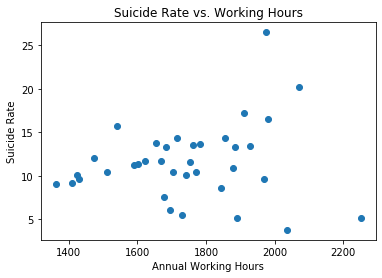

In [167]:
data_pic2 = pd.read_excel('data2.xlsx').values
data1 = []
data2 = []
data3 = []

for i in data_pic2[:, 1]:
    data1.append(i.strip())
    
for i in data1:
    data2.append(countries[i])
    
for i in data2:
    data3.append(data_pic1[data_pic1['Code']==i]['Rate'].values[0])
    
data_pic2[:, 1] = data1
data_pic2[:, 2] = data2
data_pic2[:, 4] = data3

data_pic2 = pd.DataFrame(data=data_pic2, columns=['Rank', 'Country', 'Code', 'Hours', 'Rate'])

correlation = stats.pearsonr(normalize(data_pic2['Hours']), normalize(data_pic2['Rate']))
print('Pearson Correlation between Annual Working Hours and Suicide Rate is:', correlation)
plt.plot(data_pic2['Hours'], data_pic2['Rate'], 'o')
plt.xlabel('Annual Working Hours')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate vs. Working Hours')

Pearson Correlation between Unemployment Rate and Suicide Rate is: (-0.22992000842717636, 0.1773407693362139)


Text(0.5, 1.0, 'Suicide Rate vs. Unemployment Rate')

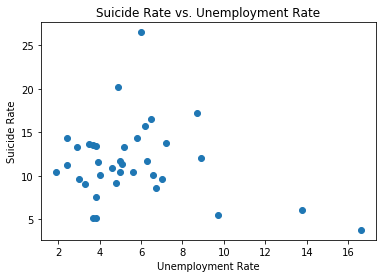

In [168]:
data_pic3 = pd.read_excel('data3.xlsx').values
unemployment = defaultdict(float)
for i in range(len(data_pic3)):
    unemployment[countries[data_pic3[i, 1].strip()]] = data_pic3[i, 2]

data4 = []
for i in data_pic2['Code']:
    data4.append(unemployment[i])

try:
    data_pic2.insert(5, 'Unemployment', data4)
except:
    print('Insert done before!')

correlation = stats.pearsonr(normalize(data_pic2['Unemployment']), normalize(data_pic2['Rate']))
print('Pearson Correlation between Unemployment Rate and Suicide Rate is:', correlation)
plt.plot(data_pic2['Unemployment'], data_pic2['Rate'], 'o')
plt.xlabel('Unemployment Rate')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate vs. Unemployment Rate')

Pearson Correlation between GDP per Capita and Suicide Rate is: (-0.21707036678247432, 0.2034851522401526)


Text(0.5, 1.0, 'Suicide Rate vs. GDP per Capita (PPP)')

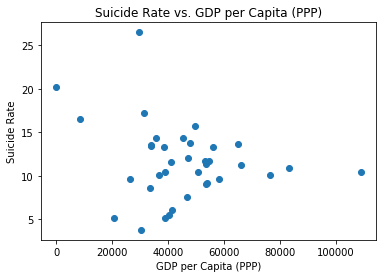

In [169]:
data_pic4 = pd.read_excel('data4.xlsx').values
gdp_ppp = defaultdict(float)
for i in range(len(data_pic4)):
    gdp_ppp[countries[data_pic4[i, 1].strip()]] = data_pic4[i, 2]
    
data5 = []
for i in data_pic2['Code']:
    data5.append(gdp_ppp[i])

try:
    data_pic2.insert(6, 'GDP', data5)
except:
    print('Insert done before!')
    
correlation = stats.pearsonr(normalize(data_pic2['GDP']), normalize(data_pic2['Rate']))
print('Pearson Correlation between GDP per Capita and Suicide Rate is:', correlation)
plt.plot(data_pic2['GDP'], data_pic2['Rate'], 'o')
plt.xlabel('GDP per Capita (PPP)')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate vs. GDP per Capita (PPP)')

Insert done before!
Pearson Correlation between Social Welfare and Suicide Rate is: (-0.4023708427719162, 0.014980607745352528)


Text(0.5, 1.0, 'Suicide Rate vs. Social Welfare as Percentage in GDP')

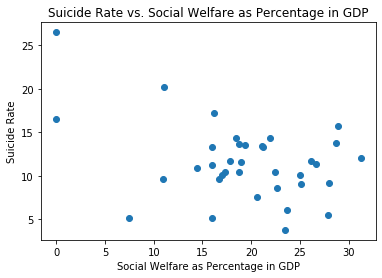

In [176]:
data_pic5 = pd.read_excel('data5.xlsx').values
welfare = defaultdict(float)
for i in range(len(data_pic5)):
    welfare[countries[data_pic5[i, 1].strip()]] = data_pic5[i, 2]
    
data5 = []
for i in data_pic2['Code']:
    data5.append(welfare[i])

try:
    data_pic2.insert(7, 'Welfare', data5)
except:
    print('Insert done before!')
    
correlation = stats.pearsonr(normalize(data_pic2['Welfare']), normalize(data_pic2['Rate']))
print('Pearson Correlation between Social Welfare and Suicide Rate is:', correlation)
plt.plot(data_pic2['Welfare'], data_pic2['Rate'], 'o')
plt.xlabel('Social Welfare as Percentage in GDP')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rate vs. Social Welfare as Percentage in GDP')

Insert done before!
Pearson Correlation between GDP per Capita and Suicide Rate is: (-0.21707036678247432, 0.2034851522401526)


Text(0.5, 1.0, 'Suicide Rate vs. GDP per Capita (PPP)')

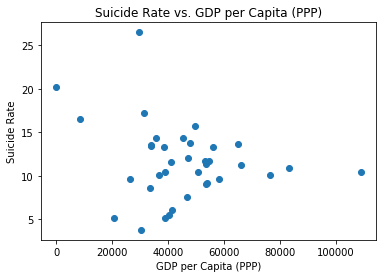

In [1]:
data = pd.read_csv('master.csv')
df1 = data[['country', 'year', 'suicides_no', 'suicides/100k pop']]
df1 = df1.groupby(['country'], as_index=False).agg({'suicides_no': 'mean', 'suicides/100k pop':'mean'})
df1.insert(1, 'iso_alpha', 'none')
df1['iso_alpha'] = df1.apply(lambda x: country_code[x['country']], axis=1)

NameError: name 'pd' is not defined

In [36]:
countries['Czech Republic']

'CSE'